In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (120, 4)
X_test.shape =  (30, 4)
y_train.shape =  (120,)
y_test.shape =  (30,)


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

input_shape = X_train.shape[1]
output_shape = len(np.unique(y_train))

model1 = Sequential()

model1.add(Input(shape=(input_shape,)))

model1.add(Dense(units=64, activation='relu', input_dim=input_shape))
model1.add(Dense(units=32, activation='relu'))

model1.add(Dense(units=output_shape, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                320       
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

input_shape = X_train.shape[1]
output_shape = len(np.unique(y_train))

model2 = Sequential()

model2.add(Input(shape=(input_shape,)))

model2.add(Dense(units=64, activation='relu', input_dim=input_shape))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=16, activation='relu'))

model2.add(Dense(units=output_shape, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 64)                320       
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
 dense_75 (Dense)            (None, 16)                528       
                                                                 
 dense_76 (Dense)            (None, 3)                 51        
                                                                 
Total params: 2979 (11.64 KB)
Trainable params: 2979 (11.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Here parameters are sum of weights and bias

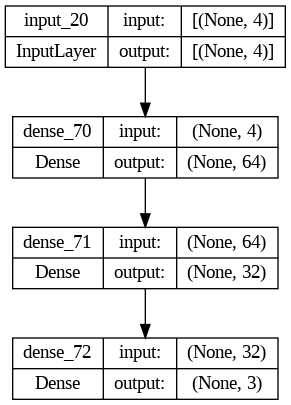

In [112]:
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True, show_layer_names=True)

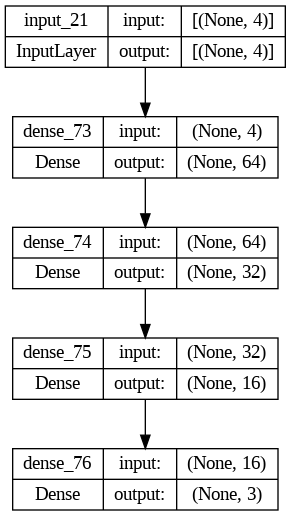

In [113]:
plot_model(model2, show_shapes=True, show_layer_names=True)

In [114]:
model1.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
4/4 [==============================] - 1s 8ms/step - loss: 1.0715 - accuracy: 0.4667
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 0.9162 - accuracy: 0.6000
Epoch 3/30
4/4 [==============================] - 0s 7ms/step - loss: 0.8217 - accuracy: 0.6833
Epoch 4/30
4/4 [==============================] - 0s 10ms/step - loss: 0.7478 - accuracy: 0.6750
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.6833
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6354 - accuracy: 0.7000
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 0.5894 - accuracy: 0.7167
Epoch 8/30
4/4 [==============================] - 0s 6ms/step - loss: 0.5508 - accuracy: 0.8167
Epoch 9/30
4/4 [==============================] - 0s 8ms/step - loss: 0.5148 - accuracy: 0.8417
Epoch 10/30
4/4 [==============================] - 0s 10ms/step - loss: 0.4841 - accuracy: 0.8333
Epoch 11/30
4/4 [====================

In [115]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")


1/1 [==============================] - 0s 160ms/step - loss: 0.1555 - accuracy: 0.9667
Test Loss: 0.1555030345916748
Test Accuracy: 96.66666388511658


In [116]:
predictions = model1.predict(X_test)

pred = predictions.argmax(axis=1)

print(pred)
print(y_test)

1/1 [==============================] - 0s 101ms/step
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [117]:
model2.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
4/4 [==============================] - 1s 8ms/step - loss: 1.0308 - accuracy: 0.5500
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 0.9491 - accuracy: 0.6417
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 0.8800 - accuracy: 0.6500
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 0.8142 - accuracy: 0.6583
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7522 - accuracy: 0.6583
Epoch 6/30
4/4 [==============================] - 0s 7ms/step - loss: 0.7024 - accuracy: 0.6583
Epoch 7/30
4/4 [==============================] - 0s 7ms/step - loss: 0.6559 - accuracy: 0.6583
Epoch 8/30
4/4 [==============================] - 0s 7ms/step - loss: 0.6170 - accuracy: 0.6583
Epoch 9/30
4/4 [==============================] - 0s 7ms/step - loss: 0.5865 - accuracy: 0.6583
Epoch 10/30
4/4 [==============================] - 0s 8ms/step - loss: 0.5616 - accuracy: 0.6583
Epoch 11/30
4/4 [======================

In [118]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

1/1 [==============================] - 0s 30ms/step - loss: 0.1555 - accuracy: 0.9667
Test Loss: 0.1555030345916748
Test Accuracy: 96.66666388511658


In [119]:
predictions = model1.predict(X_test)

pred = predictions.argmax(axis=1)

print(pred)
print(y_test)

1/1 [==============================] - 0s 39ms/step
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
